# <b>heatmap</b>

This section provides examples of how to use the <b>heatmap</b> function.  At a minimum, the `heatmap` function requires the following keywords:
<ul>
<li>`df`: a pandas DataFrame</li>
<li>`x`: the name of the DataFrame column containing the x-axis data</li>
<li>`y`: the name of the DataFrame column containing the y-axis data</li>
<li>`z`: the name of the DataFrame column containing the z-axis data</li>
</ul>

Heatmaps in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> can display both categorical and non-categorical data on either a uniform or non-uniform grid.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_heatmap.csv'))
df.head()

,Player,Category,Average
0,Lebron James,Points,27.5
1,Lebron James,Assists,9.1
2,Lebron James,Rebounds,8.6
3,Lebron James,Blocks,0.9
4,James Harden,Points,30.4


### Set theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Categorical heatmap

First consider a case where both the `x` and `y` DataFrame columns contain categorical data values:

### No data labels

Average vs Player vs Category.png


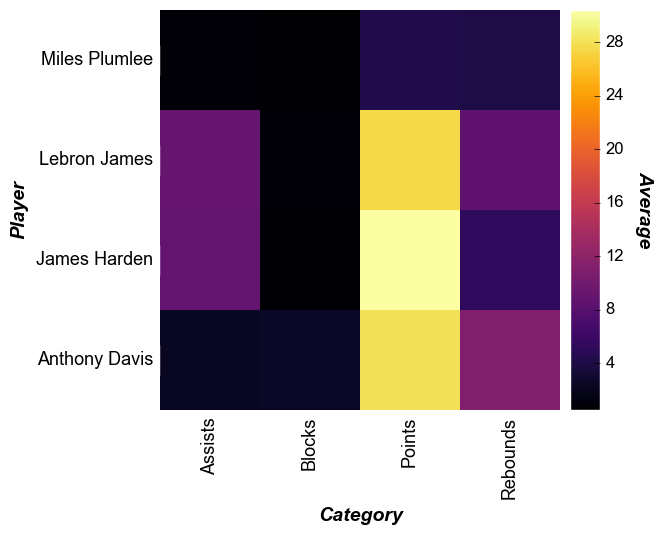

In [5]:
fcp.heatmap(df=df, x='Category', y='Player', z='Average', cbar=True, show=SHOW)

Note that for heatmaps the `x` tick labels are rotated 90&#176; by default.  This can be overridden via the keyword `tick_labels_major_x_rotation`.

### With data labels

Average vs Player vs Category.png


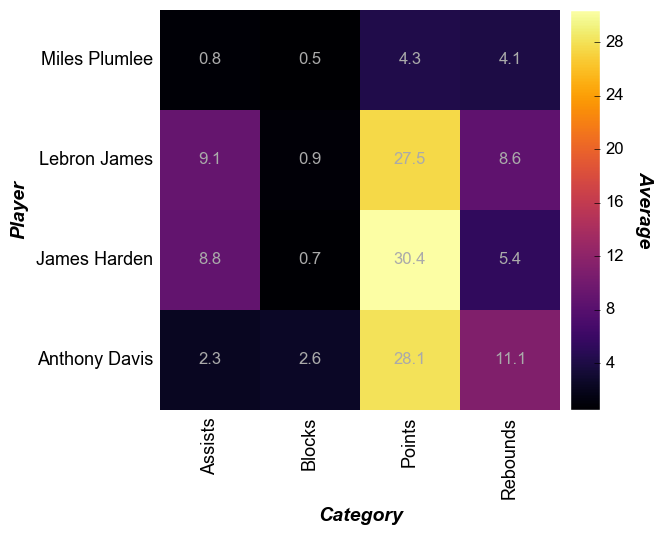

In [6]:
fcp.heatmap(df=df, x='Category', y='Player', z='Average', cbar=True, data_labels=True, 
            heatmap_font_color='#aaaaaa', show=SHOW, tick_labels_major_y_edge_width=0, ws_ticks_ax=5)
# need to disable the tick marks

## Non-uniform data

A major difference between heatmaps and contour plots is that contour plots assume that the `x` and `y` DataFrame column values are numerical and continuous.  With a heatmap, we can cast numerical data into categorical form.  Note that any missing values get mapped as `nan` values are not not plotted.  

In [7]:
# Read the contour DataFrame
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_contour.csv'))

Value vs Y vs X by Batch by Experiment.png


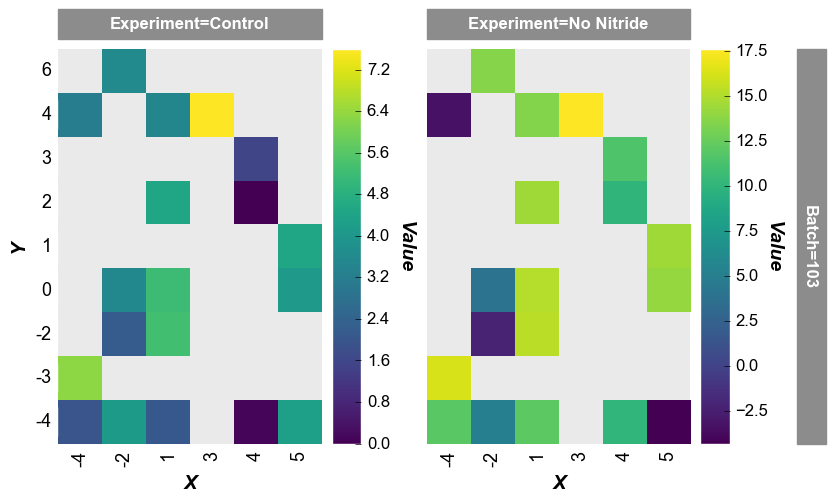

In [8]:
fcp.heatmap(df=df2, x='X', y='Y', z='Value', row='Batch', col='Experiment', 
            cbar=True, show=SHOW, share_z=True, ax_size=[400, 400],
            data_labels=False, label_rc_font_size=12, filter='Batch==103', cmap='viridis')

Note that the x-axis width is not 400px as specified by the keyword `ax_scale`.  This occurs because the data set does not have as many values on the x-axis as on the y-axis.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> applies the axis size to the axis with the most items and scales the other axis accordingly.